In [ ]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import SVG, display, HTML
from graphviz import Source
from sklearn.metrics import precision_score, recall_score

In [ ]:
style = "<style>svg{width:10% !important; height: 10% !important;}</style>"
HTML(style)

In [ ]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Cabin', 'Survived'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
X = pd.get_dummies(X).drop(['Sex_male'], axis=1).fillna({'Age': X.Age.median()})
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1
4,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,0,0


In [ ]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [ ]:
y = titanic.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Died', 'Survived'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
clf.score(X, y)

0.9797979797979798

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
clf.score(X_train, y_train)

0.9798657718120806

In [ ]:
clf.score(X_test, y_test)

0.7627118644067796

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
clf.score(X_train, y_train)

0.8338926174496645

In [ ]:
clf.score(X_test, y_test)

0.823728813559322

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
for max_depth in range(1, 100):
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
  scores_data = scores_data.append(temp_score_data)

<ipython-input-25-4a6fbffe3d96>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
<ipython-input-25-4a6fbffe3d96>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
<ipython-input-25-4a6fbffe3d96>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
<ipython-input-25-4a6fbffe3d96>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
<ipython-input-25-4a6fbffe3d96>:10: FutureWarning: The frame.append method is deprecated and will be removed from pa

In [ ]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,95,0.979866,0.762712,0.770168
0,96,0.979866,0.769492,0.775224
0,97,0.979866,0.769492,0.770182
0,98,0.979866,0.779661,0.763459


In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.770168
293,96,cross_val_score,0.775224
294,97,cross_val_score,0.770182
295,98,cross_val_score,0.763459


<Axes: xlabel='max_depth', ylabel='score'>

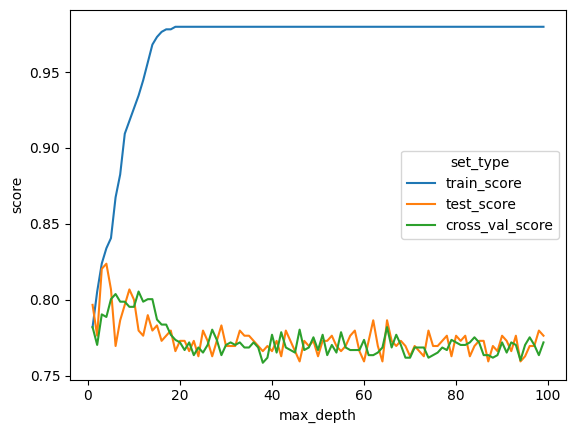

In [ ]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [ ]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.800392
...,...,...,...,...
0,95,0.979866,0.762712,0.770168
0,96,0.979866,0.769492,0.775224
0,97,0.979866,0.769492,0.770182
0,98,0.979866,0.779661,0.763459


In [ ]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.798683
206,9,cross_val_score,0.795308
207,10,cross_val_score,0.795308


In [ ]:
scores_data_long.query("set_type == 'cross_val_score'").score.max()

0.805392156862745

In [ ]:
best_clf = clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [ ]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7762711864406778

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = tree.DecisionTreeClassifier()

In [ ]:
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [85]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5) # RandomizedSearchCV

In [ ]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [ ]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [ ]:
best_params = grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
precision_score(y_test, y_pred)

0.8023255813953488

In [ ]:
recall_score(y_test, y_pred)

0.575

In [ ]:
y_pred_prob = best_clf.predict_proba(X_test)

<Axes: >

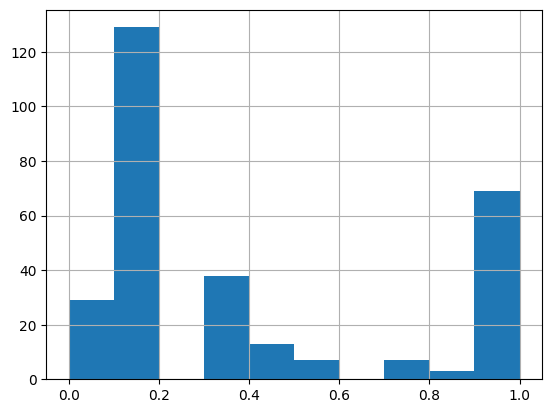

In [ ]:
pd.Series(y_pred_prob[:, 1]).hist()

In [ ]:
y_pred = np.where(y_pred_prob[:, 1] > 0.8, 1, 0)

In [ ]:
precision_score(y_test, y_pred)

0.7372262773722628

In [ ]:
recall_score(y_test, y_pred)

0.5166666666666667

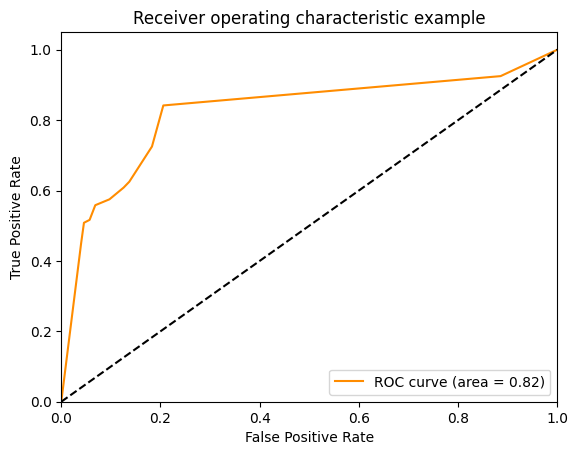

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")